In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('breast_cancer.csv')


In [89]:
df
y_df = df['type']
y_df
x_df = df.drop('type',axis = 1)
x_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [78]:
y_predict = model.predict(X_test)
y_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predict,y_test)
score

0.956140350877193

In [69]:
from sklearn.metrics import confusion_matrix
i = pd.DataFrame(confusion_matrix(y_test, y_predict),index = ['实际不患癌症','实际患癌症'],columns = ['预测不患癌症','预测患癌症'])
i

,预测不患癌症,预测患癌症
实际不患癌症,32,4
实际患癌症,1,77


In [73]:
print(model.coef_)
print(model.intercept_)

[[ 0.98207184  0.0976227  -0.49493959  0.04729314 -0.16036035 -0.17420627
  -0.48258643 -0.26651504 -0.22945646 -0.02800128  0.00412599  0.602549
   0.49275062 -0.09049992 -0.03612656  0.02196009 -0.0922625  -0.04523804
  -0.05981657  0.0058331   0.33503741 -0.36548402 -0.09730174 -0.02342359
  -0.29275998 -0.3044415  -0.94559062 -0.46007258 -0.62750473 -0.0600907 ]]
[35.81126362]


In [93]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba
a = pd.DataFrame(y_pred_proba,columns = ['分类为0的概率','分类为1的概率'])
a

,分类为0的概率,分类为1的概率
0,0.000640,9.993600e-01
1,0.000064,9.999355e-01
2,0.999945,5.544965e-05
3,0.011189,9.888112e-01
4,1.000000,2.327405e-10
...,...,...
109,0.000128,9.998715e-01
110,0.101686,8.983138e-01
111,0.000646,9.993544e-01
112,1.000000,1.111192e-09


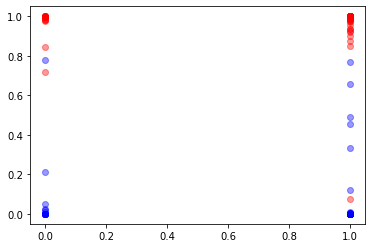

In [105]:
color1 = '#FF0000'
color2 = '#0000FF'
plt.scatter(y_predict[y_test>0.5],y_pred_proba[:,1][y_test>0.5],c=color1, alpha=0.4, label='正样本')
plt.scatter(y_predict[y_test<0.5],y_pred_proba[:,1][y_test<0.5],c=color2, alpha=0.4, label='负样本')
plt.show()